In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
data = pd.read_csv('spotifycharts_20170629to20180126_global.csv')
data['date'] = pd.to_datetime(data['date'].astype(str), format='%Y-%m-%d')
data

,region,date,Position,Track Name,Artist,Streams,URL
0,global,2017-06-29,1,Despacito - Remix,Luis Fonsi,5945441,https://open.spotify.com/track/5CtI0qwDJkDQGwX...
1,global,2017-06-29,2,Wild Thoughts (feat. Rihanna & Bryson Tiller),DJ Khaled,4496288,https://open.spotify.com/track/1OAh8uOEOvTDqkK...
2,global,2017-06-29,3,"I'm the One (feat. Justin Bieber, Quavo, Chanc...",DJ Khaled,4291359,https://open.spotify.com/track/3DXncPQOG4VBw3Q...
3,global,2017-06-29,4,2U (feat. Justin Bieber),David Guetta,3849460,https://open.spotify.com/track/3A7qX2QjDlPnazU...
4,global,2017-06-29,5,Shape of You,Ed Sheeran,3492692,https://open.spotify.com/track/7qiZfU4dY1lWllz...
...,...,...,...,...,...,...,...
42377,global,2018-01-26,196,Redbone,Childish Gambino,623117,https://open.spotify.com/track/3kxfsdsCpFgN412...
42378,global,2018-01-26,197,The Weekend - Funk Wav Remix,SZA,614714,https://open.spotify.com/track/0P6AWOA4LG1XOct...
42379,global,2018-01-26,198,Stay,Zedd,612468,https://open.spotify.com/track/0I20rLT2MJDhcF9...
42380,global,2018-01-26,199,From Now On,Hugh Jackman,610407,https://open.spotify.com/track/3IkWmgGsXbsafru...


In [3]:
data.describe()

,Position,Streams
count,42382.000000,4.238200e+04
mean,100.521589,1.044169e+06
std,57.729067,7.426654e+05
min,1.000000,3.802890e+05
25%,51.000000,5.760940e+05
50%,101.000000,7.652815e+05
75%,151.000000,1.235182e+06
max,200.000000,8.553009e+06


## Question 1

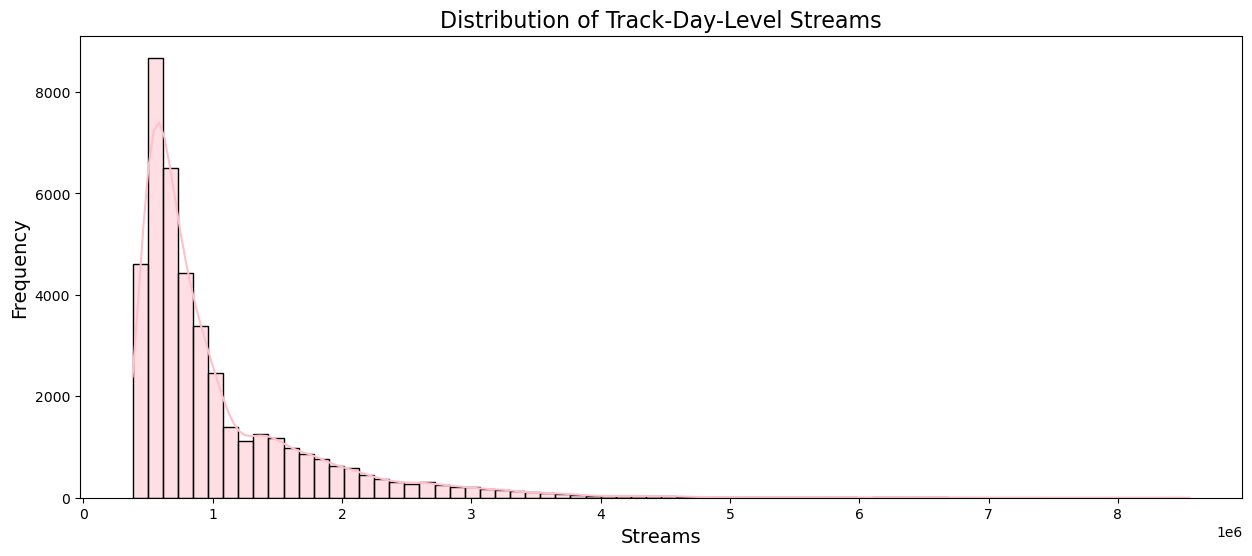

In [4]:
plt.figure(figsize=(15, 6))
sns.histplot(data['Streams'], bins=70, kde=True, color='pink')
plt.title('Distribution of Track-Day-Level Streams', fontsize=16)
plt.xlabel('Streams', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

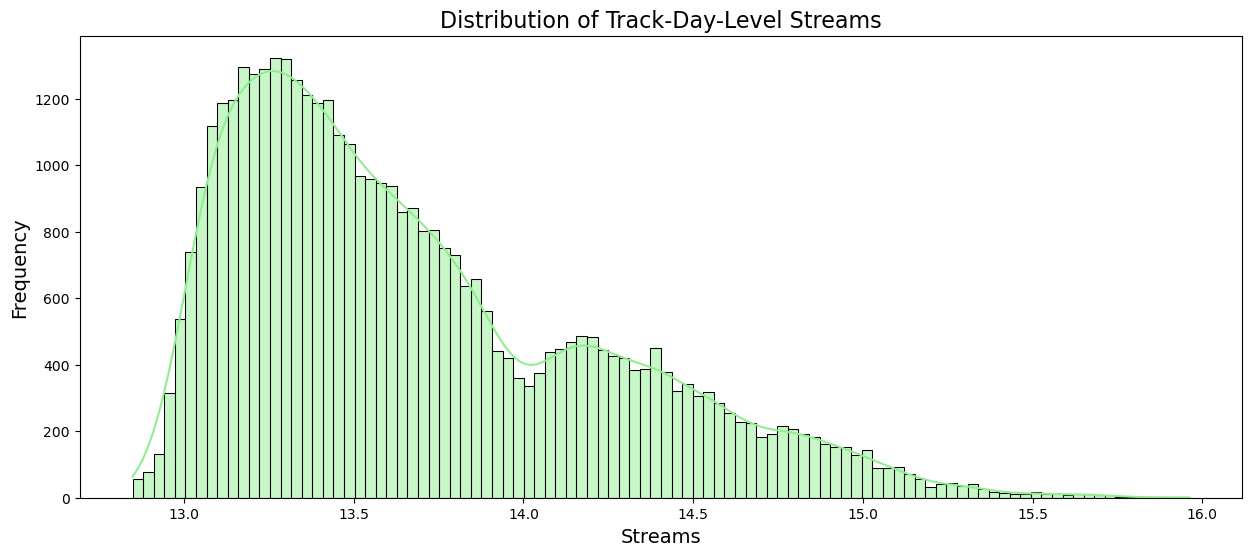

In [5]:
data['log_streams'] = np.log(data['Streams'])
plt.figure(figsize=(15, 6))
sns.histplot(data['log_streams'], bins=100, kde=True, color='lightgreen')
plt.title('Distribution of Track-Day-Level Streams', fontsize=16)
plt.xlabel('Streams', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

## Question 2

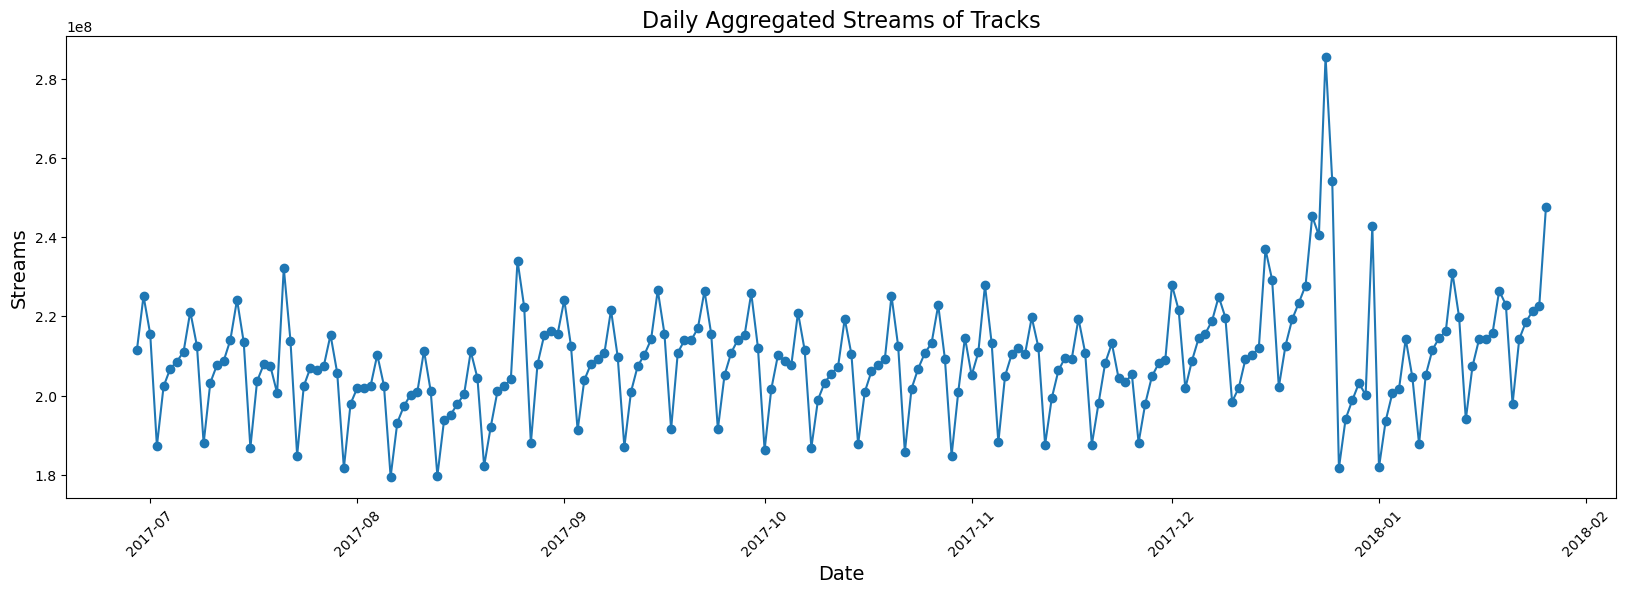

In [6]:
data1 = data.copy()

daily_data = data1.groupby('date')['Streams'].sum().reset_index()

plt.figure(figsize=(20, 6))
plt.plot(daily_data['date'], daily_data['Streams'], marker='o', linestyle='-')
plt.title('Daily Aggregated Streams of Tracks', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Streams', fontsize=14)
plt.xticks(rotation=45)
plt.show()

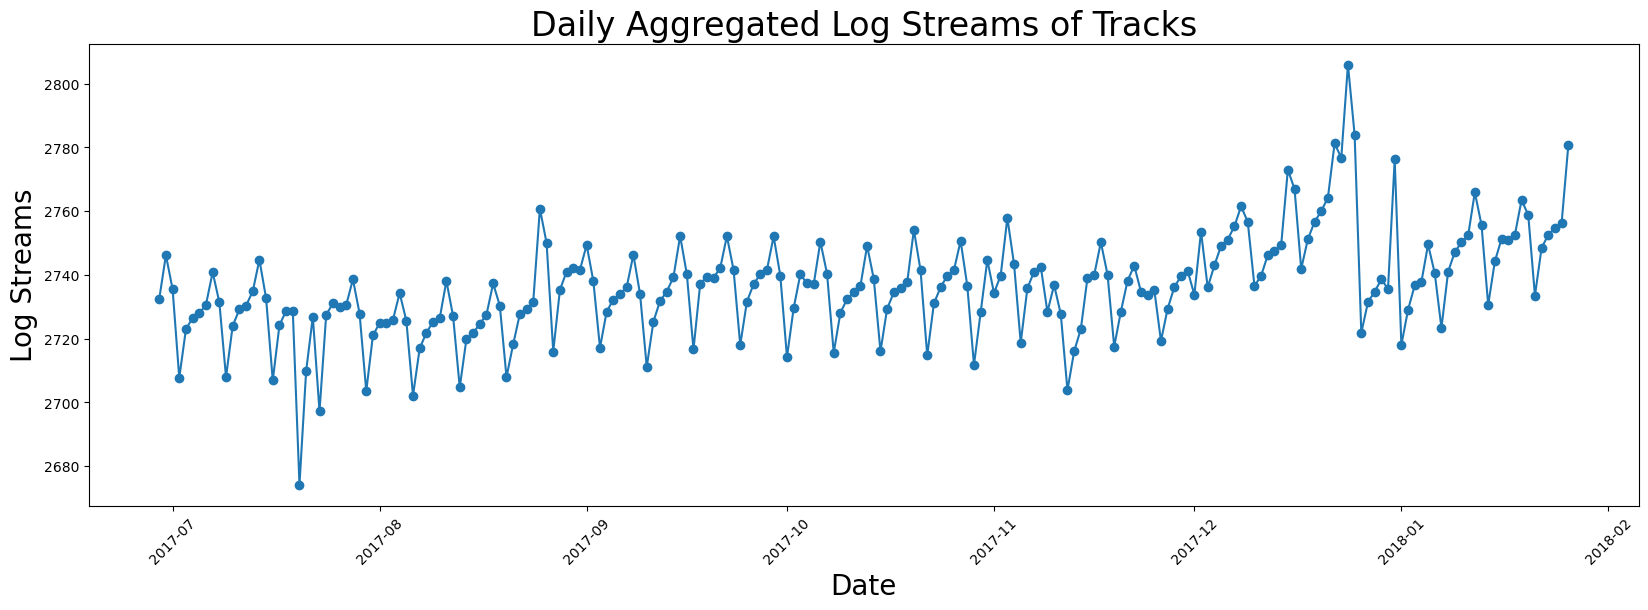

In [7]:
daily_data1 = data1.groupby('date')['log_streams'].sum().reset_index()

plt.figure(figsize=(20, 6))
plt.plot(daily_data1['date'], daily_data1['log_streams'], marker='o', linestyle='-')
plt.title('Daily Aggregated Log Streams of Tracks', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Log Streams', fontsize=20)
plt.xticks(rotation=45)
plt.show()

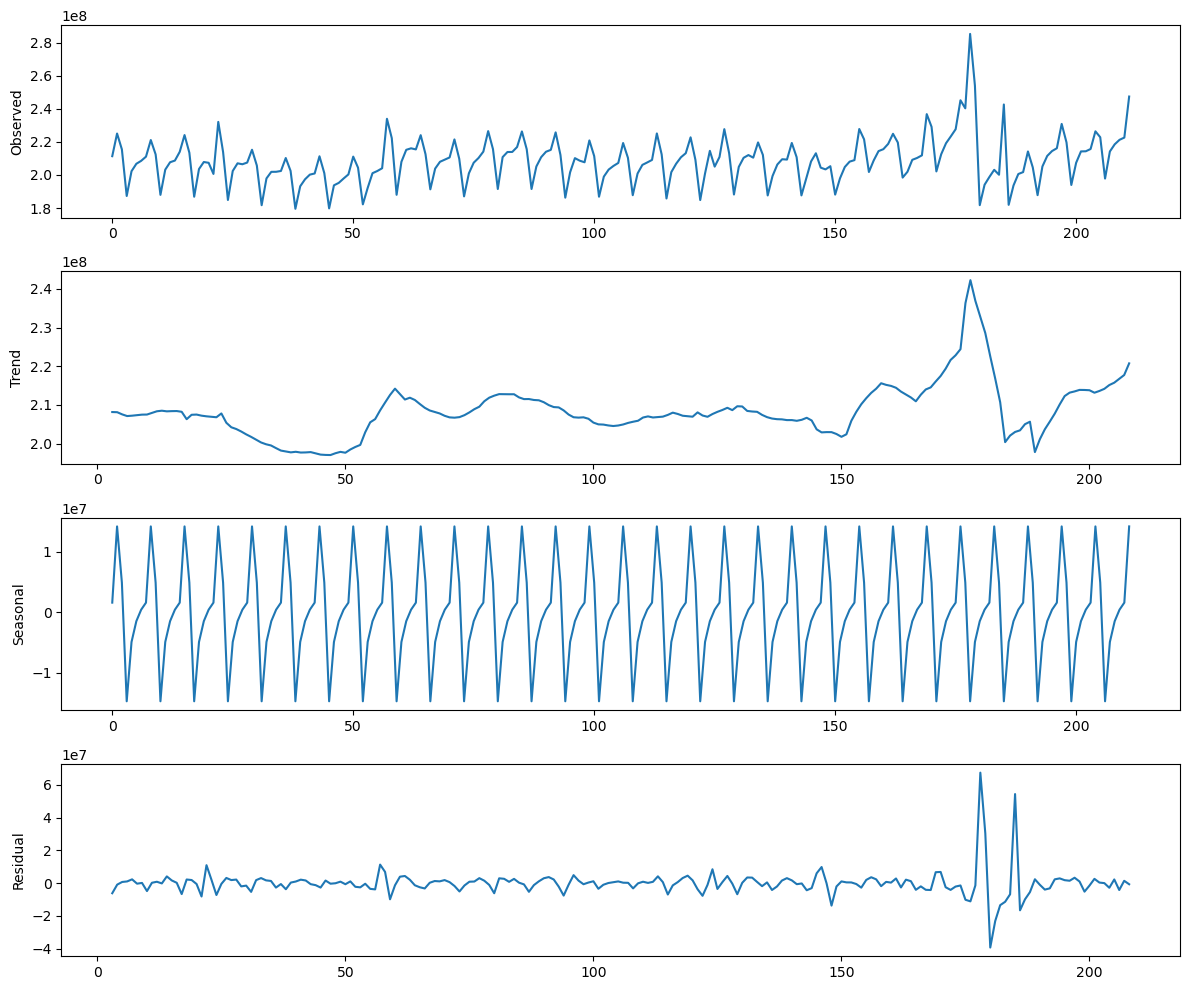

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(daily_data['Streams'], model='additive', period=7)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

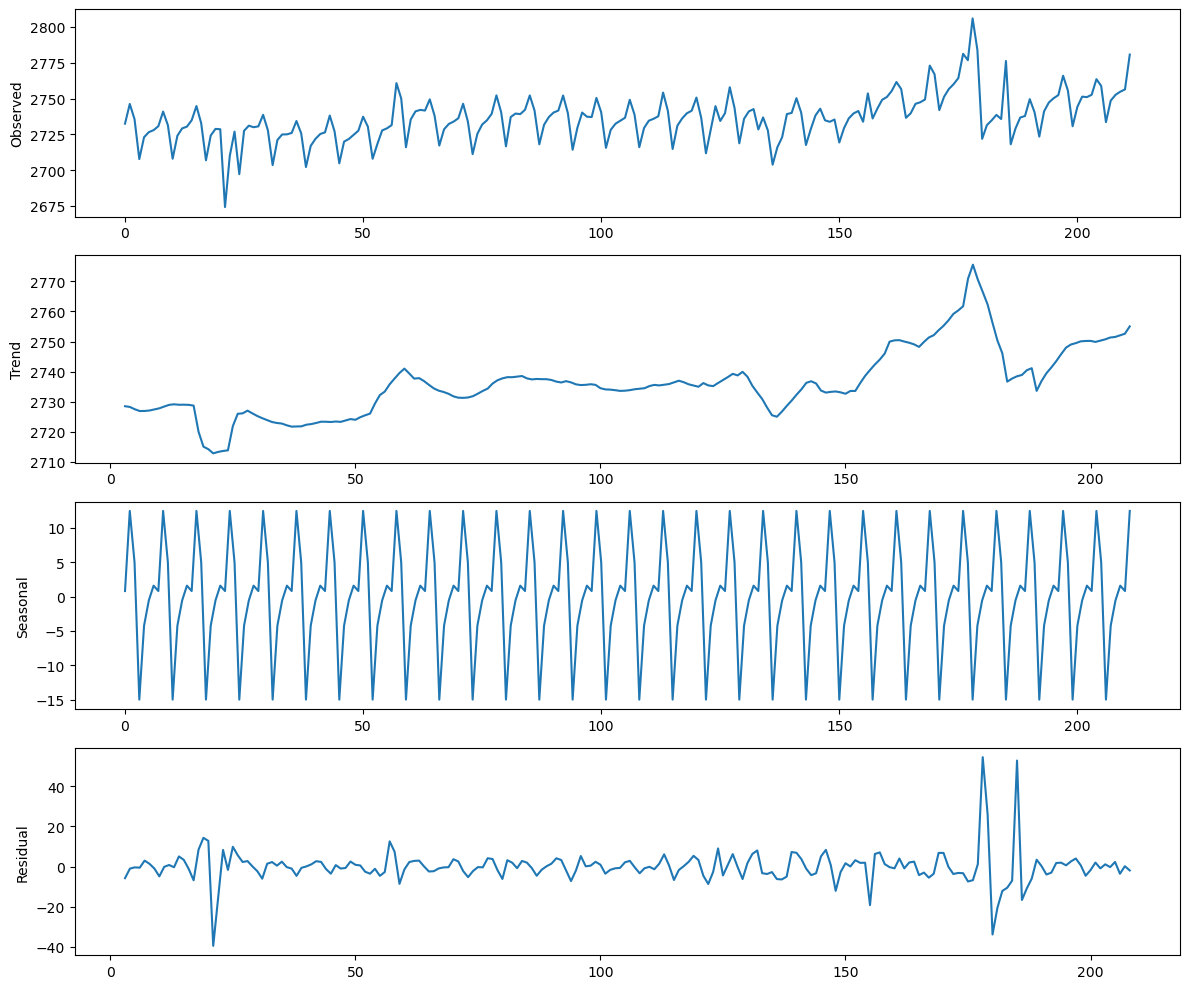

In [9]:
result = seasonal_decompose(daily_data1['log_streams'], model='additive', period=7)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

In [10]:
top_50_data = data[data['Position'] <= 50]
top_50_data

,region,date,Position,Track Name,Artist,Streams,URL,log_streams
0,global,2017-06-29,1,Despacito - Remix,Luis Fonsi,5945441,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,15.598135
1,global,2017-06-29,2,Wild Thoughts (feat. Rihanna & Bryson Tiller),DJ Khaled,4496288,https://open.spotify.com/track/1OAh8uOEOvTDqkK...,15.318763
2,global,2017-06-29,3,"I'm the One (feat. Justin Bieber, Quavo, Chanc...",DJ Khaled,4291359,https://open.spotify.com/track/3DXncPQOG4VBw3Q...,15.272114
3,global,2017-06-29,4,2U (feat. Justin Bieber),David Guetta,3849460,https://open.spotify.com/track/3A7qX2QjDlPnazU...,15.163443
4,global,2017-06-29,5,Shape of You,Ed Sheeran,3492692,https://open.spotify.com/track/7qiZfU4dY1lWllz...,15.066183
...,...,...,...,...,...,...,...,...
42227,global,2018-01-26,46,Anywhere,Rita Ora,1556639,https://open.spotify.com/track/7EI6Iki24tBHAMx...,14.258040
42228,global,2018-01-26,47,The Middle,Zedd,1548576,https://open.spotify.com/track/09IStsImFySgyp0...,14.252846
42229,global,2018-01-26,48,Bartier Cardi (feat. 21 Savage),Cardi B,1532866,https://open.spotify.com/track/75FDPwaULRdYDn4...,14.242650
42230,global,2018-01-26,49,Gucci Gang,Lil Pump,1530710,https://open.spotify.com/track/43ZyHQITOjhciSU...,14.241242


In [11]:
daily_top_50_data = top_50_data.groupby(['date'])['Streams'].sum().reset_index()

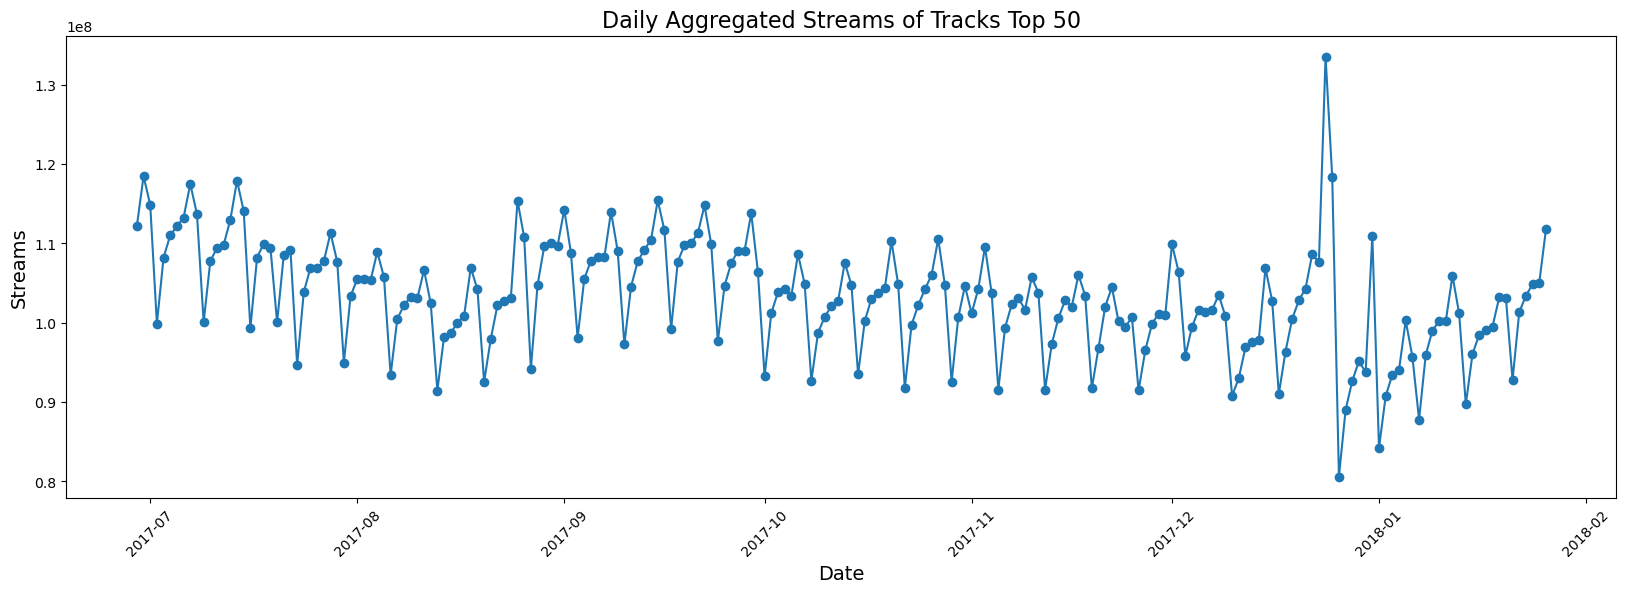

In [12]:
plt.figure(figsize=(20, 6))
plt.plot(daily_data['date'], daily_top_50_data['Streams'], marker='o', linestyle='-')
plt.title('Daily Aggregated Streams of Tracks Top 50', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Streams', fontsize=14)
plt.xticks(rotation=45)
plt.show()

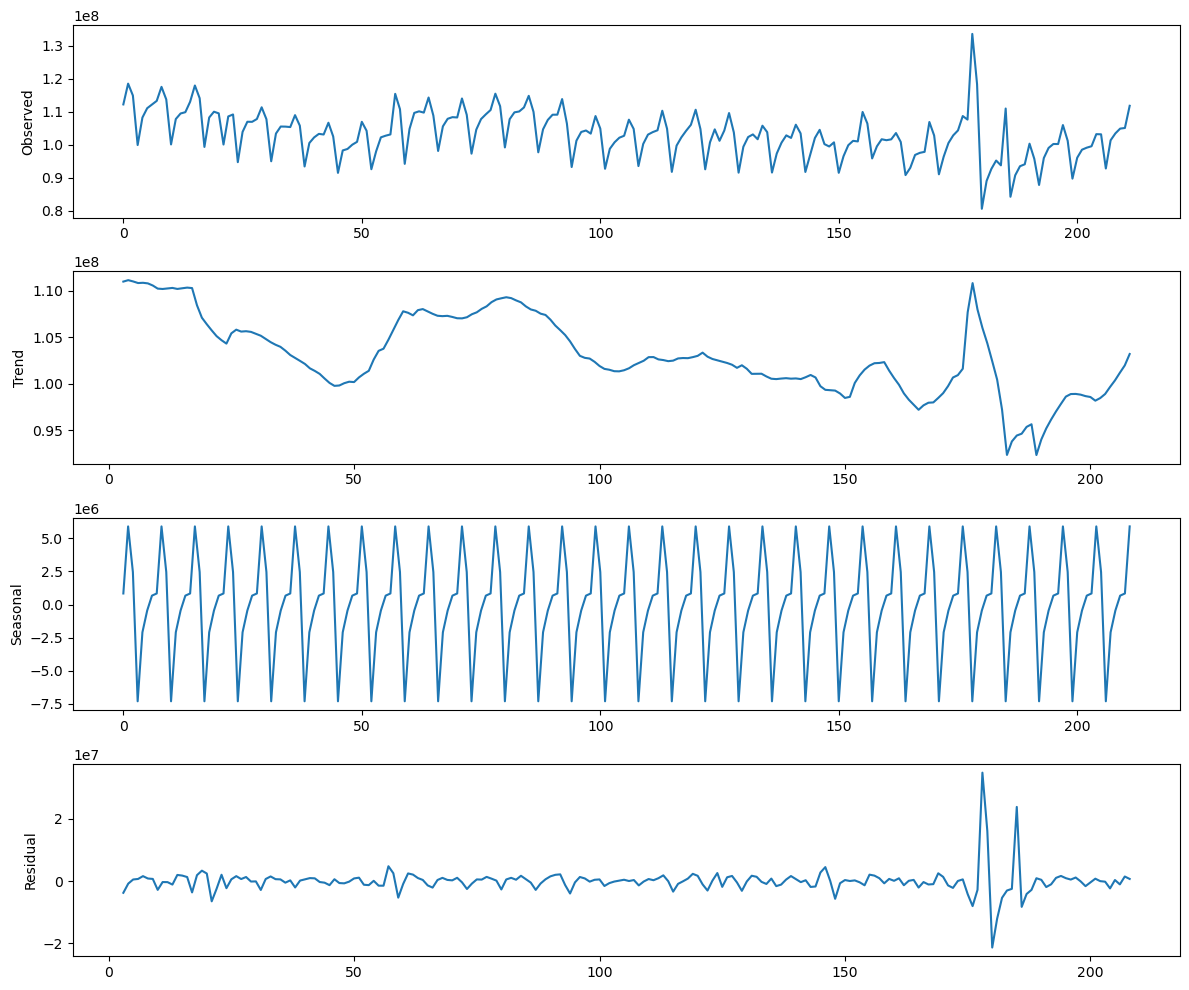

In [13]:
result_top_50 = seasonal_decompose(daily_top_50_data['Streams'], model='additive', period=7)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
result_top_50.observed.plot(ax=ax1, label='Top 50 Tracks')
ax1.set_ylabel('Observed')
result_top_50.trend.plot(ax=ax2, label='Top 50 Tracks')
ax2.set_ylabel('Trend')
result_top_50.seasonal.plot(ax=ax3, label='Top 50 Tracks')
ax3.set_ylabel('Seasonal')
result_top_50.resid.plot(ax=ax4, label='Top 50 Tracks')
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

## Question 3

In [14]:
data['day_of_week'] = data['date'].dt.day_name()
data['Month'] = data['date'].dt.month
dum = pd.get_dummies(data['day_of_week'])
data = pd.concat([data, dum], axis=1)
condition_dec = (data['Month'] == 12)
data['I_Dec'] = condition_dec.astype(int)

In [15]:
condition_50 = data['Position'] < 51
data['I'] = condition_50.astype(int)
data

,region,date,Position,Track Name,Artist,Streams,URL,log_streams,day_of_week,Month,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,I_Dec,I
0,global,2017-06-29,1,Despacito - Remix,Luis Fonsi,5945441,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,15.598135,Thursday,6,0,0,0,0,1,0,0,0,1
1,global,2017-06-29,2,Wild Thoughts (feat. Rihanna & Bryson Tiller),DJ Khaled,4496288,https://open.spotify.com/track/1OAh8uOEOvTDqkK...,15.318763,Thursday,6,0,0,0,0,1,0,0,0,1
2,global,2017-06-29,3,"I'm the One (feat. Justin Bieber, Quavo, Chanc...",DJ Khaled,4291359,https://open.spotify.com/track/3DXncPQOG4VBw3Q...,15.272114,Thursday,6,0,0,0,0,1,0,0,0,1
3,global,2017-06-29,4,2U (feat. Justin Bieber),David Guetta,3849460,https://open.spotify.com/track/3A7qX2QjDlPnazU...,15.163443,Thursday,6,0,0,0,0,1,0,0,0,1
4,global,2017-06-29,5,Shape of You,Ed Sheeran,3492692,https://open.spotify.com/track/7qiZfU4dY1lWllz...,15.066183,Thursday,6,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42377,global,2018-01-26,196,Redbone,Childish Gambino,623117,https://open.spotify.com/track/3kxfsdsCpFgN412...,13.342490,Friday,1,1,0,0,0,0,0,0,0,0
42378,global,2018-01-26,197,The Weekend - Funk Wav Remix,SZA,614714,https://open.spotify.com/track/0P6AWOA4LG1XOct...,13.328912,Friday,1,1,0,0,0,0,0,0,0,0
42379,global,2018-01-26,198,Stay,Zedd,612468,https://open.spotify.com/track/0I20rLT2MJDhcF9...,13.325252,Friday,1,1,0,0,0,0,0,0,0,0
42380,global,2018-01-26,199,From Now On,Hugh Jackman,610407,https://open.spotify.com/track/3IkWmgGsXbsafru...,13.321881,Friday,1,1,0,0,0,0,0,0,0,0


In [16]:
X = sm.add_constant(data[['I']])
y = data['Streams']

model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Streams   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                 7.273e+04
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:27:25   Log-Likelihood:            -6.1188e+05
No. Observations:               42382   AIC:                         1.224e+06
Df Residuals:                   42380   BIC:                         1.224e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.035e+05   2527.132    278.398      0.0

In [17]:
X = sm.add_constant(data[['I']])
y = data['log_streams']

model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_streams   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                 1.026e+05
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:27:25   Log-Likelihood:                -8150.0
No. Observations:               42382   AIC:                         1.630e+04
Df Residuals:                   42380   BIC:                         1.632e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.4247      0.002   8162.163      0.0

In [18]:
X = sm.add_constant(data[['I', 'Friday', 'Sunday', 'I_Dec']])
y = data['log_streams']

model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_streams   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                 2.691e+04
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:27:25   Log-Likelihood:                -7420.0
No. Observations:               42382   AIC:                         1.485e+04
Df Residuals:                   42377   BIC:                         1.489e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.4111      0.002   6962.871      0.0

In [19]:
X = sm.add_constant(data[['I', 'Friday', 'Sunday', 'I_Dec','Position']])
y = data['log_streams']

model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_streams   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 1.040e+05
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:27:25   Log-Likelihood:                 20579.
No. Observations:               42382   AIC:                        -4.115e+04
Df Residuals:                   42376   BIC:                        -4.109e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2222      0.003   5519.606      0.0

## Question 4

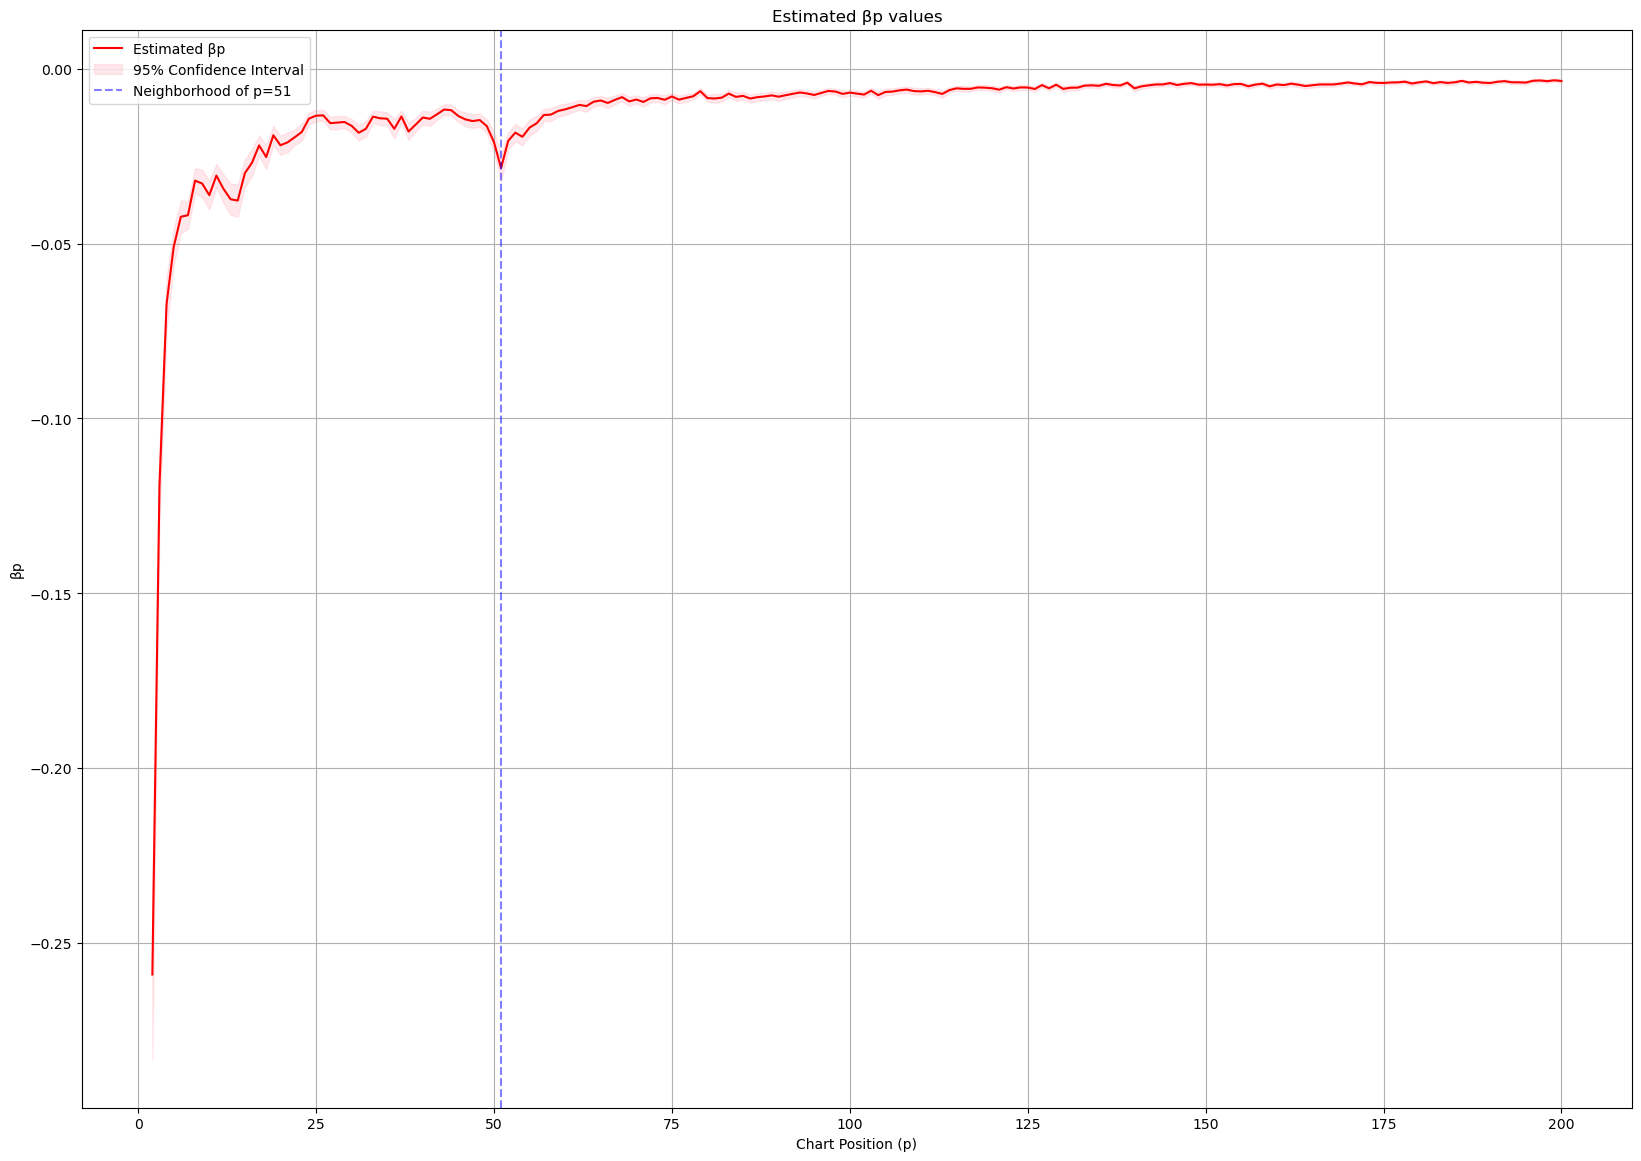

In [20]:
data = data.sort_values(['date', 'Position'])

# Calculate log change in streams
data['log_streams_change'] = np.log(data['Streams'] / (data.groupby('date')['Streams'].shift(1)))

data.dropna(subset=['log_streams_change'], inplace=True)

position_betas = []
conf_ints = []

positions = range(2, 201)

for position in positions:
    data_position = data[data['Position'] == position]
    y = data_position['log_streams_change'].dropna()
    
    if y.empty:
        position_betas.append(np.nan)
        conf_ints.append([np.nan, np.nan])
    else:
        X = sm.add_constant(np.ones(len(y)))
        model = sm.OLS(y, X).fit()
        position_betas.append(model.params[0])
        conf_ints.append(model.conf_int().loc['const'].tolist())

position_betas = np.array(position_betas)
conf_ints = np.array(conf_ints)

# Plot the results
plt.figure(figsize=(20, 14))
plt.plot(positions, position_betas, label='Estimated βp', color='red')
plt.fill_between(positions, conf_ints[:, 0], conf_ints[:, 1], alpha=0.3, label='95% Confidence Interval', color='lightpink')
plt.axvline(x=51, color='b', linestyle='--', label='Neighborhood of p=51', alpha=0.5)
plt.xlabel('Chart Position (p)')
plt.ylabel('βp')
plt.title('Estimated βp values')
plt.grid(True)
plt.legend()
plt.show()

In [21]:
condition_51 = data['Position'] == 51
data['I_51'] = condition_51.astype(int)
X = sm.add_constant(data[['Position','I_51']])
y = data['log_streams_change']

model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     log_streams_change   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     3071.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:27:26   Log-Likelihood:                 93512.
No. Observations:               42170   AIC:                        -1.870e+05
Df Residuals:                   42167   BIC:                        -1.870e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0297      0.000   -113.967      0.0

In [22]:
avg_streams50 = data[data['Position'] == 50]['Streams'].mean()
I_51_estimate = model.params['I_51']
impact_51 = avg_streams50 * I_51_estimate
impact_51

-9538.054001477765

In [23]:
I_51_estimate

-0.0076158462678786